> # PCA - From Scratch

In [22]:
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()
X = iris.data
y = iris.target

In [2]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X = scalar.fit_transform(X)

In [4]:
cov_mat = np.cov(X.T)

In [5]:
cov_mat

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [6]:
eigen_values, eigen_vectors = np.linalg.eig(cov_mat)

In [7]:
eigen_values

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [8]:
eigen_vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [9]:
# Sort the eigenvectors in descending order based on the eigenvalues
idx = eigen_values.argsort()[::-1]
eigen_vectors = eigen_vectors[:,idx]

In [10]:
eigen_vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [11]:
# Keep only the top n_components eigenvectors
n_components = 2
eigen_vectors = eigen_vectors[:,:n_components]

In [12]:
eigen_vectors

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

In [13]:
# Normalize the eigenvectors
eigen_vectors_norm = eigen_vectors / np.linalg.norm(eigen_vectors)

In [14]:
eigen_vectors_norm

array([[ 0.36844924, -0.26687456],
       [-0.1904574 , -0.65286862],
       [ 0.41041404, -0.01731818],
       [ 0.39941389, -0.04733513]])

In [15]:
X_transformed = X.dot(eigen_vectors)

In [16]:
X_transformed

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538],
       [-2.07563095, -1.48917752],
       [-2.44402884, -0.0476442 ],
       [-2.23284716, -0.22314807],
       [-2.33464048,  1.11532768],
       [-2.18432817,  0.46901356],
       [-2.1663101 , -1.04369065],
       [-2.32613087, -0.13307834],
       [-2.2184509 ,  0.72867617],
       [-2.6331007 ,  0.96150673],
       [-2.1987406 , -1.86005711],
       [-2.26221453, -2.68628449],
       [-2.2075877 , -1.48360936],
       [-2.19034951, -0.48883832],
       [-1.898572  , -1.40501879],
       [-2.34336905, -1.12784938],
       [-1.914323  , -0.40885571],
       [-2.20701284, -0.92412143],
       [-2.7743447 , -0.45834367],
       [-1.81866953, -0.08555853],
       [-2.22716331, -0.13725446],
       [-1.95184633,  0.62561859],
       [-2.05115137, -0.24216355],
       [-2.16857717, -0.52714953],
       [-2.13956345,

In [17]:
print(X_transformed.shape)

(150, 2)


from sklearn.decomposition import PCA \
pca = PCA(n_components = 2)

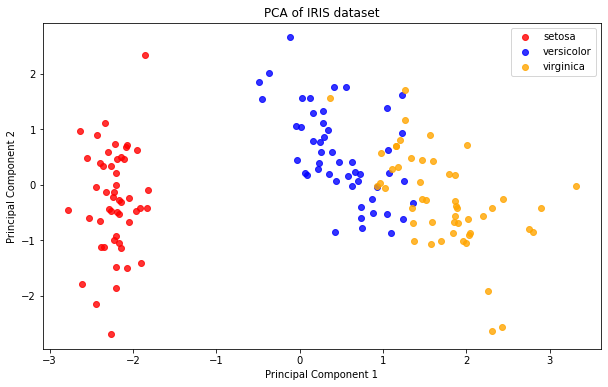

In [37]:
# Create a 2D scatter plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'orange']

for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1], color=color, alpha=.8,
                label=target_name)

plt.legend()
plt.title('PCA of IRIS dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()